calculate_z_serial_purepython took 9.149492740631104 seconds


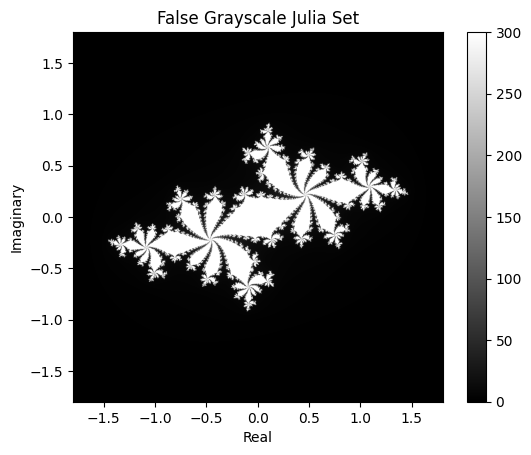

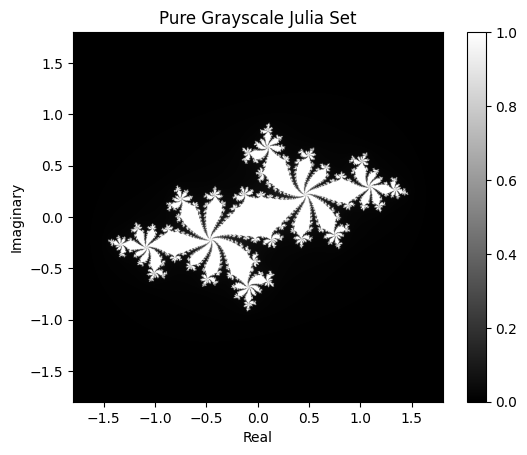

In [1]:
#Excercise 1
import time
import numpy as np
import matplotlib.pyplot as plt

# Example 2-1: Defining global constants for the coordinate space
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -0.42193

# Example 2-2: Establishing the coordinate lists as inputs to our calculation function
def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs), build Julia set, and display"""
    x_step = (float(x2 - x1) / float(desired_width))
    y_step = (float(y1 - y2) / float(desired_width))
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step

    # Build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed;
    # we use it to simulate a real-world scenario with several inputs to
    # our function.
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    return zs, cs

# Example 2-3: Our CPU-bound calculation function
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

# Example 2-4: main for our code
if __name__ == "__main__":
    desired_width = 1000
    max_iterations = 300

    # Calculate the Julia set using a pure Python solution
    zs, cs = calc_pure_python(desired_width, max_iterations)
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print("calculate_z_serial_purepython took", secs, "seconds")

    # Generate false grayscale plot
    output = np.array(output).reshape((desired_width, desired_width))
    plt.imshow(output, cmap='gray', extent=(x1, x2, y1, y2))
    plt.colorbar()
    plt.title("False Grayscale Julia Set")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.show()

    # Generate pure grayscale plot
    output = np.array(output) / max_iterations
    plt.imshow(output, cmap='gray', extent=(x1, x2, y1, y2))
    plt.colorbar()
    plt.title("Pure Grayscale Julia Set")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.show()


@timefn:calculate_z_serial_purepython took 10.272897720336914 seconds


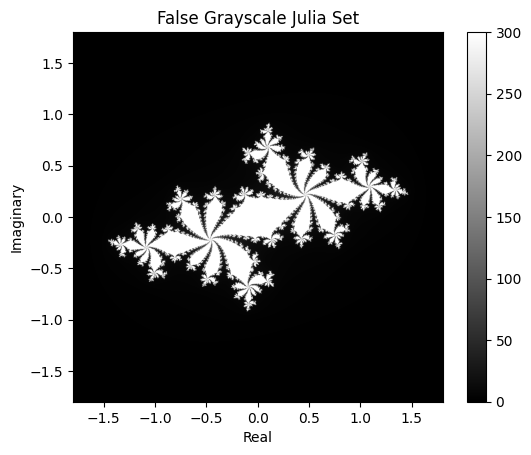

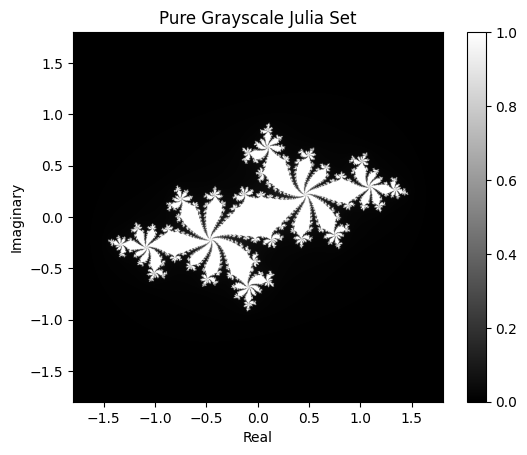

In [2]:
#Excercise 2
import time
import numpy as np
import matplotlib.pyplot as plt
from functools import wraps



# Define the timefn decorator
def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print("@timefn:" + fn.__name__ + " took " + str(t2 - t1) + " seconds")
        return result
    return measure_time

# Example 2-3: Our CPU-bound calculation function
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

# Other functions remain the same as before...

# Example 2-4: main for our code
if __name__ == "__main__":
    desired_width = 1000
    max_iterations = 300

    # Calculate the Julia set using a pure Python solution
    zs, cs = calc_pure_python(desired_width, max_iterations)
    output = calculate_z_serial_purepython(max_iterations, zs, cs)

    # Generate false grayscale plot
    output = np.array(output).reshape((desired_width, desired_width))
    plt.imshow(output, cmap='gray', extent=(x1, x2, y1, y2))
    plt.colorbar()
    plt.title("False Grayscale Julia Set")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.show()

    # Generate pure grayscale plot
    output = np.array(output) / max_iterations
    plt.imshow(output, cmap='gray', extent=(x1, x2, y1, y2))
    plt.colorbar()
    plt.title("Pure Grayscale Julia Set")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.show()


In [5]:
import timeit

# Define setup code if needed
setup_code = '''
import julia1
'''

# Define the statement to be measured
stmt = 'julia1.calc_pure_python(desired_width=1000, max_iterations=300)'

# Run timeit
result = timeit.timeit(stmt, setup=setup_code, number=10)

print("Execution time:", result, "seconds")




Execution time: 4.708925000042655 seconds


In [4]:
import cProfile
import julia1

# Run the profiler
cProfile.run('julia1.calc_pure_python(desired_width=1000, max_iterations=300)', sort='tottime')

         2002077 function calls in 1.464 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.839    0.839    1.244    1.244 julia1.py:11(calc_pure_python)
  2002000    0.573    0.000    0.573    0.000 {method 'append' of 'list' objects}
        1    0.040    0.040    1.284    1.284 <string>:1(<module>)
        1    0.011    0.011    0.016    0.016 {built-in method select.select}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    1.301    0.650 base_events.py:1908(_run_once)
        1    0.000    0.000    0.000    0.000 iostream.py:127(_event_pipe_gc)
        1    0.000    0.000    0.016    0.016 selectors.py:319(select)
        2    0.000    0.000    0.000    0.000 {method 'run' of '_contextvars.Context' objects}
        2    0.000    0.000    0.000    0.000 tasks.py:653(sleep)
        3    0.000    0.000    0.000    0.000 threading.py:115

In [ ]:
#Ejercico 6
# julia1.py

from line_profiler import LineProfiler

# Decorate the function to be profiled
@profile
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

if __name__ == "__main__":
    # Create LineProfiler object
    profiler = LineProfiler()
    profiler.add_function(calculate_z_serial_purepython)

    desired_width = 1000
    max_iterations = 300

    # Run the script with kernprof
    kernprof -l -v julia1.py

    # Analyze the output file (julia1.py.lprof)
    # The results will show the time spent on each line of the calculate_z_serial_purepython function
